In [ ]:
##@Author: Gemma Gordon
#@Date: January 2022
# Script to analyse CDR amino acid composition for sequence datasets

#### Analysis of CDR amino acid composition for sequence datasets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import logomaker as lm

Gives columns for CDR sequences in dict with position and amino acid at that position (ANARCI-predicted)

### Amino acid composition for CDRs

Load in sequence datasets 

In [9]:
sdabs_seqs = pd.read_csv('sdabs_final_seq_dataset.csv')

In [10]:
abs_seqs = pd.read_csv('abs_final_seq_dataset.csv')

In [11]:
len(abs_seqs)

1621889

In [12]:
len(sdabs_seqs)

1601636

Split Abs into germline groups (sdAbs all belong to same IGHV3)

Change V gene column to just e.g. IGHV1 rather than full e.g. IGHV1-69*01

In [12]:
germlines = []

for row in abs_seqs['v_gene']:
    v_gene = row[0:5]
    germlines.append(v_gene)

abs_seqs['germline'] = germlines

Save Abs seqs split by germline into new dataframes

In [13]:
abs_seqs_ighv3 = abs_seqs[abs_seqs['germline'] == 'IGHV3']

Correct dict syntax for all seq dicts in loop columns, otherwise not read into df properly

In [16]:
import ast

In [17]:
def correct_dict(pd_series):

    corrected_dicts = []

    for d in pd_series.values:
        temp = d.split(' ')
        d_corrected = ast.literal_eval(''.join(temp))
        corrected_dicts.append(d_corrected)

    return corrected_dicts

In [18]:
# make list of datasets
dataset_names = sorted([])
for i in np.arange(1,8,1):
    for j in np.arange(1,4,1):
        dataset_names.append('v' + str(i) + 'h' + str(j))

for x in ['sdabsh1', 'sdabsh2', 'sdabsh3']:
    dataset_names.append(x) 

In [19]:
# for each h1/h2/h3 column in datasets, correct the column of dicts
output_dict = dict()
for data_key, data_vals in zip(all_seqs_dict.keys(), all_seqs_dict.values()):
    print(data_key)
    dataset = data_vals[['cdrh1', 'cdrh2', 'cdrh3']]
    for col in dataset:
        name = str(data_key + '_' + col)
        corrected_dicts = correct_dict(dataset[col])
        output_dict[name] = corrected_dicts

IGHV1
IGHV2
IGHV3
IGHV4
IGHV5
IGHV6
IGHV7
sdAbs


For each position in numbered sequences, get amino acid composition

In [20]:
output_dfs = dict()
for item, name in zip(output_dict, output_dict.keys()):   
    df_name = str(name + '_df')
    df = pd.DataFrame.from_records(output_dict[name])
    output_dfs[df_name] = df

In [21]:
output_dfs.keys()

dict_keys(['IGHV1_cdrh1_df', 'IGHV1_cdrh2_df', 'IGHV1_cdrh3_df', 'IGHV2_cdrh1_df', 'IGHV2_cdrh2_df', 'IGHV2_cdrh3_df', 'IGHV3_cdrh1_df', 'IGHV3_cdrh2_df', 'IGHV3_cdrh3_df', 'IGHV4_cdrh1_df', 'IGHV4_cdrh2_df', 'IGHV4_cdrh3_df', 'IGHV5_cdrh1_df', 'IGHV5_cdrh2_df', 'IGHV5_cdrh3_df', 'IGHV6_cdrh1_df', 'IGHV6_cdrh2_df', 'IGHV6_cdrh3_df', 'IGHV7_cdrh1_df', 'IGHV7_cdrh2_df', 'IGHV7_cdrh3_df', 'sdAbs_cdrh1_df', 'sdAbs_cdrh2_df', 'sdAbs_cdrh3_df'])

In [25]:
# for item, name in zip(output_dfs.values(), output_dfs.keys()):
#     filepath = str('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/aa_comp_csvs_cdrs/unfiltered_data/' + name)
#     item.to_csv(filepath)
    #item.to_csv(str(name + '.csv'))

load in csvs

In [5]:
import os 

In [ ]:
output_dfs = dict()
for csv in sorted(os.listdir('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/aa_comp_csvs_cdrs')):
    if 'df' in csv:
        name = csv.split('.')[0]
        filepath = '/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/aa_comp_csvs_cdrs/'
        file = str(filepath + csv)
        df = pd.read_csv(file, index_col=0)
        output_dfs[name] = df

In [22]:
# print lens of each germline dataset to check size 
for df in output_dfs:
    print(df, len(output_dfs[df]))

IGHV1_cdrh1_df 276142
IGHV1_cdrh2_df 276142
IGHV1_cdrh3_df 276142
IGHV2_cdrh1_df 83752
IGHV2_cdrh2_df 83752
IGHV2_cdrh3_df 83752
IGHV3_cdrh1_df 763740
IGHV3_cdrh2_df 763740
IGHV3_cdrh3_df 763740
IGHV4_cdrh1_df 425068
IGHV4_cdrh2_df 425068
IGHV4_cdrh3_df 425068
IGHV5_cdrh1_df 53052
IGHV5_cdrh2_df 53052
IGHV5_cdrh3_df 53052
IGHV6_cdrh1_df 16002
IGHV6_cdrh2_df 16002
IGHV6_cdrh3_df 16002
IGHV7_cdrh1_df 4133
IGHV7_cdrh2_df 4133
IGHV7_cdrh3_df 4133
sdAbs_cdrh1_df 1601636
sdAbs_cdrh2_df 1601636
sdAbs_cdrh3_df 1601636


Find proportion of each amino acid at each position - represent as matrix

In [23]:
def get_comp_per_position2(df):

        # transpose df into correct orientation to read cols
        #df = df.drop(labels='fw_label', axis=1)
        #df = df.transpose()

        # read each column and return counts for each amino acid 
        # https://biopython.org/docs/1.76/api/Bio.Alphabet.IUPAC.html
        # NOTE 'X' is for unknowns
        amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']#, 'X']

        # replace 'X' with NaN and then drop NaN/don't count them when finding proportions 
        df = df.replace(to_replace='X', value=np.nan)

        # for each amino acid, find its proportion at each position
        props_per_position_dicts = []
        for col in sorted(df.columns):
                #if col.strip().isnumeric() == True: # if not an insertion position 
                        props = df[col].value_counts(normalize=True, dropna=True)
                        counts = df[col].value_counts(dropna=True) # get counts
                        
                        props_dict = dict()
                        for aa, val in zip(props.index, list(props)):
                                props_dict[aa] = val
                        for aa in amino_acids:
                                # if no instances of an amino acid at position, set proportion as 0
                                if aa not in props_dict.keys():
                                        props_dict[aa] = 0.0
                        final_dict = dict()
                        final_dict[col.strip()] = props_dict # add key for which column (position) proportions are for

                        # cutoff if <5% of sequences in set have that position
                        if float(np.sum(list(counts))) > float((len(df)/20)):
                                props_per_position_dicts.append(final_dict)
                        else: 
                                print('Less than 5%% of total sequences have an amino acid at position:', col.strip())


        return props_per_position_dicts

Generate matrices of amino acid proportions/counts for all germlines and loops - ignoring actual position

In [25]:
output_keys = []
for o in output_dfs.keys():
    o = o.split('_df')[0]
    output_keys.append(o)

In [11]:
# concat each loop data together
cdrh1, cdrh2, cdrh3 = dict(), dict(), dict()

for df in props_dfs:
    if 'cdrh1' in df:
        cdrh1[df] = props_dfs[df]
    if 'cdrh2' in df:
        cdrh2[df] = props_dfs[df]
    if 'cdrh3' in df:
        cdrh3[df] = props_dfs[df]

In [12]:
cdrh3.keys()

dict_keys(['IGHV1_cdrh3_props_df', 'IGHV2_cdrh3_props_df', 'IGHV3_cdrh3_props_df', 'IGHV4_cdrh3_props_df', 'IGHV5_cdrh3_props_df', 'IGHV6_cdrh3_props_df', 'IGHV7_cdrh3_props_df', 'sdAbs_cdrh3_props_df'])

In [26]:
output_keys = []
for o in output_dfs.keys():
    o = o.split('_df')[0]
    output_keys.append(o)

In [27]:
props_dfs2 = dict()
for df, name in zip(output_dfs, output_keys):
    print(name)
    props_per_position_dicts = get_comp_per_position2(output_dfs[df])
    dict_name = str(name + '_props_dict')
    #props_df = pd.DataFrame(props_per_position_dicts)
    #props_df['Germline'] = name
    props_dict = props_per_position_dicts 
    props_dfs2[dict_name] = props_dict

IGHV1_cdrh1
Less than 5%% of total sequences have an amino acid at position: 31
Less than 5%% of total sequences have an amino acid at position: 32
Less than 5%% of total sequences have an amino acid at position: 32A
Less than 5%% of total sequences have an amino acid at position: 32B
Less than 5%% of total sequences have an amino acid at position: 32C
Less than 5%% of total sequences have an amino acid at position: 32D
Less than 5%% of total sequences have an amino acid at position: 33
Less than 5%% of total sequences have an amino acid at position: 33A
Less than 5%% of total sequences have an amino acid at position: 33B
Less than 5%% of total sequences have an amino acid at position: 33C
Less than 5%% of total sequences have an amino acid at position: 33D
Less than 5%% of total sequences have an amino acid at position: 34
IGHV1_cdrh2
Less than 5%% of total sequences have an amino acid at position: 60
Less than 5%% of total sequences have an amino acid at position: 60A
Less than 5%% o

In [28]:
def format_df(props_dfs, which_df):

    dfs = []
    keys = []
    for item in props_dfs[which_df]: # for each col in df 
        for key in item.keys():
            df = pd.DataFrame.from_dict(item[key], orient='index')
        dfs.append(df)
        keys.append(key)

    results = pd.concat(dfs, axis=1)
    results.columns = keys

    return results

In [29]:
final_props_dfs = dict()
for which_df in props_dfs2.keys():
    results = format_df(props_dfs2, which_df)
    name = which_df.split('_')
    # csv_name = str(name[0] + '_' + name[1] + '_aa_props.csv')
    # results.to_csv(csv_name)
    final_props_dfs[which_df] = results

Plot bar charts of amino acid composition

In [63]:
import matplotlib.colors as mcolors

In [55]:
len(list(mcolors.CSS4_COLORS.keys())[0:21])

21

In [30]:
# set colour palette 
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']#, 'X']

colors = ['lightcoral', 'firebrick', 'red', 'coral', 'sandybrown', 
            'darkgoldenrod', 'gold', 'olive', 'yellowgreen', 'lawngreen', 
            'darkgreen', 'teal', 'aqua', 'deepskyblue', 'royalblue', 'navy', 
            'blueviolet', 'violet', 'fuchsia', 'mediumvioletred']#, 'deeppink', ]

colour_palette = dict()
for a, c in zip(amino_acids, colors):
    colour_palette[a] = c

Plot sequence logos 

In [31]:
def make_sequence_logo(df, colour_palette):

    # Function to make sequence logo figure of a dataframe in which for each position the fraction of all amino acid (classes) are stored

    #df = dict_fw_results[fwr]
    df = df.transpose()

    # change index (positions) to int from str and sort in order of position
    # df.index = df.index.astype('int')
    # df = df.sort_index(axis=0, ascending=True)
    df.index = sorted(df.index)
    x_labels = sorted(df.index)
    df = df.reset_index()
    # Make figure
    logo = lm.Logo(df.drop(labels='index', axis=1), color_scheme=colour_palette, stack_order='small_on_top')

    # Improve figure
    # Give the right labels to plot
    logo.ax.set_ylabel("Normalised frequency", fontsize=12)
    logo.ax.set_xlabel("IMGT positions", fontsize=12)
    logo.ax.set_xticks(range(len(df)))
    logo.ax.set_xticklabels(x for x in list(x_labels)) 

    return

['IGHV1', 'cdrh1']
['IGHV1', 'cdrh2']
['IGHV1', 'cdrh3']
['IGHV2', 'cdrh1']
['IGHV2', 'cdrh2']
['IGHV2', 'cdrh3']
['IGHV3', 'cdrh1']
['IGHV3', 'cdrh2']
['IGHV3', 'cdrh3']
['IGHV4', 'cdrh1']
['IGHV4', 'cdrh2']
['IGHV4', 'cdrh3']
['IGHV5', 'cdrh1']
['IGHV5', 'cdrh2']
['IGHV5', 'cdrh3']
['IGHV6', 'cdrh1']
['IGHV6', 'cdrh2']
['IGHV6', 'cdrh3']
['IGHV7', 'cdrh1']
['IGHV7', 'cdrh2']
['IGHV7', 'cdrh3']


/Users/gemmagordon/opt/anaconda3/lib/python3.8/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


['sdAbs', 'cdrh1']
['sdAbs', 'cdrh2']
['sdAbs', 'cdrh3']


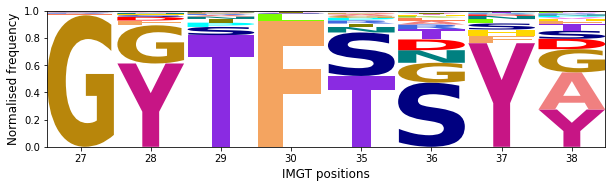

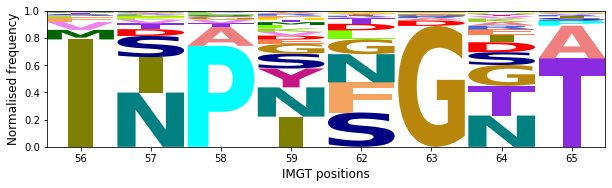

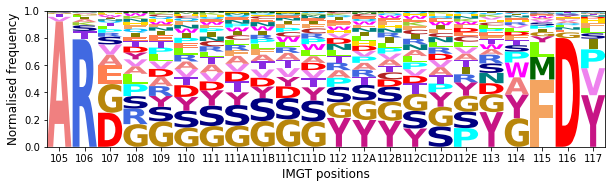

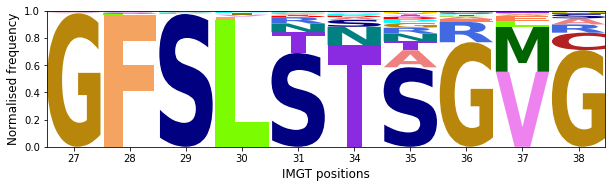

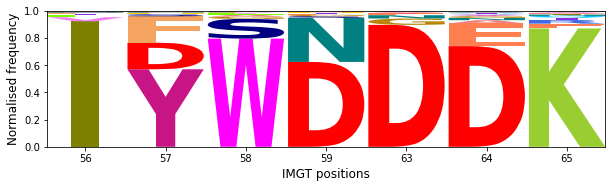

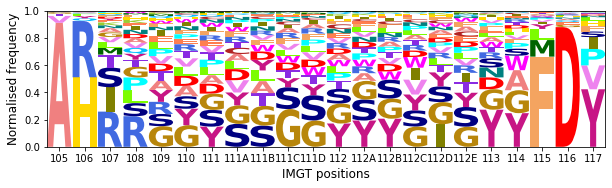

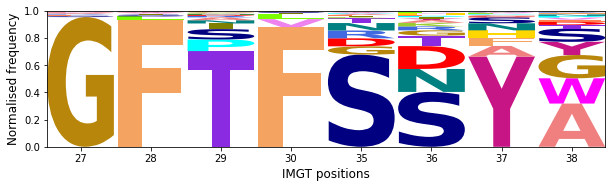

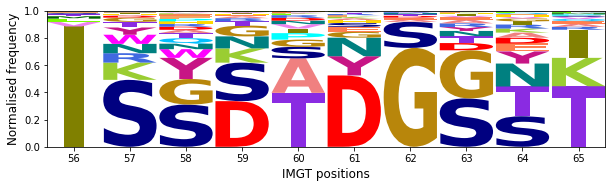

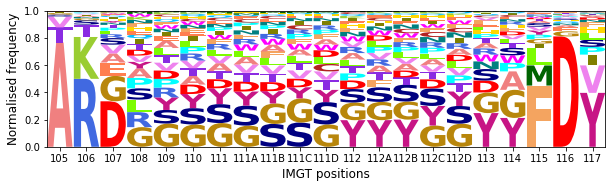

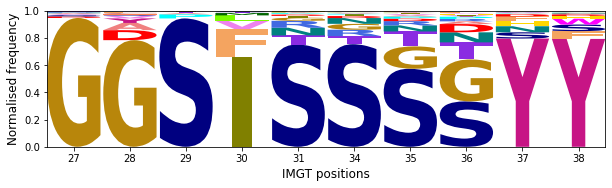

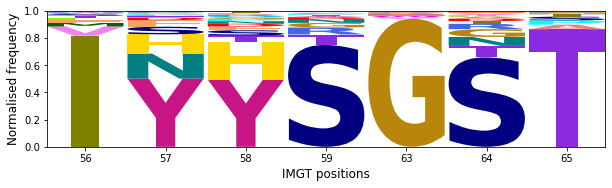

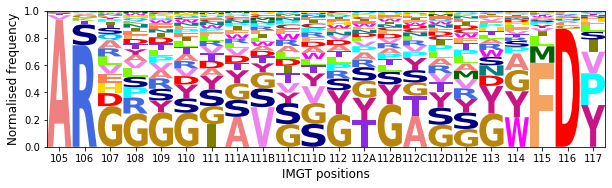

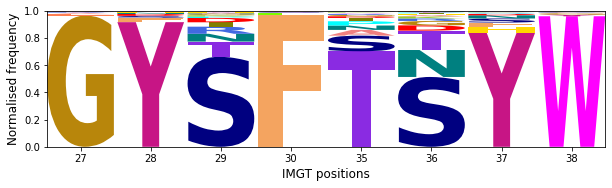

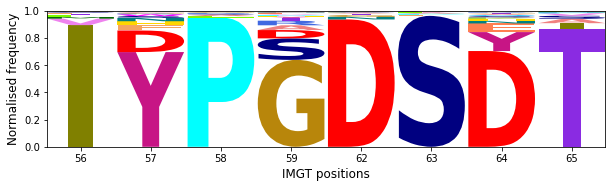

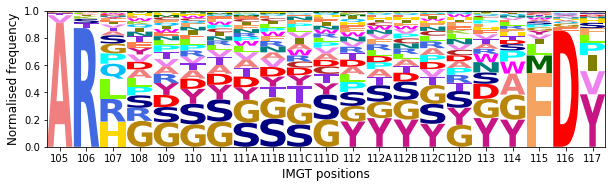

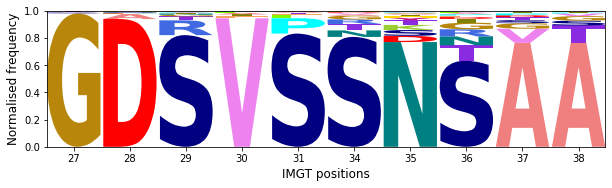

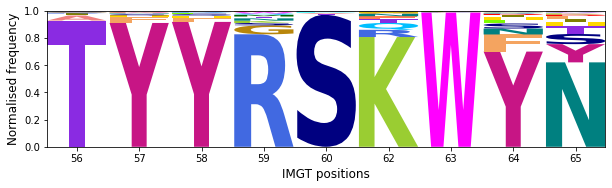

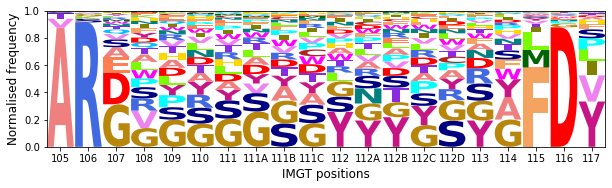

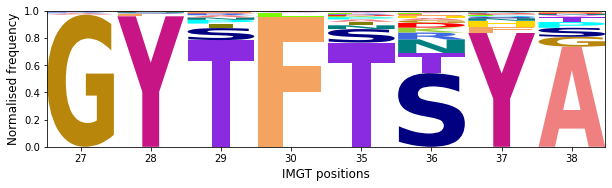

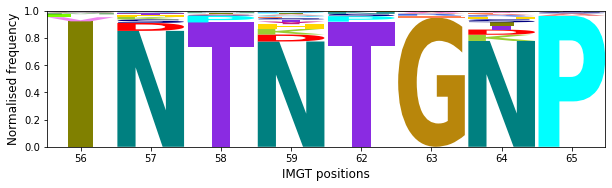

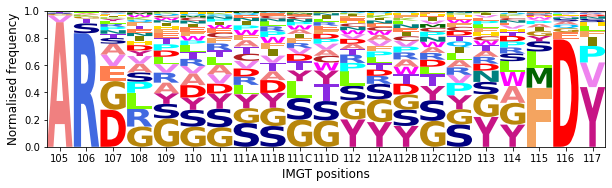

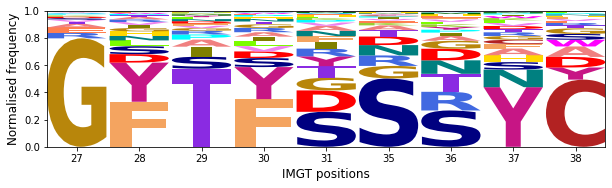

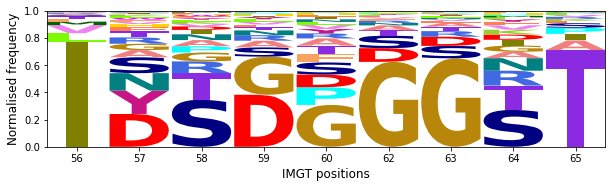

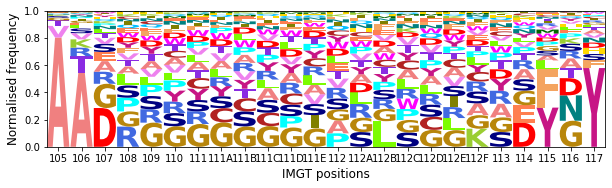

In [32]:
# load in csvs 
# for file in sorted(os.listdir('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/aa_comp_csvs_cdrs')):
#     if 'aa_props' in file:
#         filepath = str('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/aa_comp_csvs_cdrs/' + file)

for df in final_props_dfs.keys():
    which_plot = df.split('_')[0:2]
    print(which_plot)
    if 'IGHV3' in which_plot:
    #df = pd.read_csv(filepath, index_col=0)
        make_sequence_logo(final_props_dfs[df], colour_palette)